# Feature Selection dan Feature Extraction

In [16]:
import numpy as np
import pandas as pd

In [17]:
data=pd.read_csv('D:/datminc_week5.csv')
data

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [18]:
#tipe data
data.dtypes

sepallength    float64
sepalwidth     float64
petallength    float64
petalwidth     float64
class           object
dtype: object

In [19]:
#cek missing value
data.isnull().sum(axis=0) 

sepallength    0
sepalwidth     0
petallength    0
petalwidth     0
class          0
dtype: int64

C:\Users\Windows 8.1\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


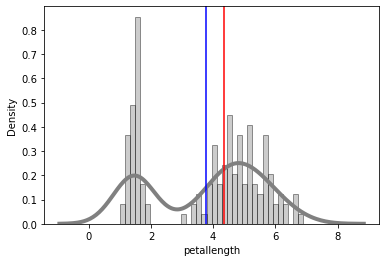

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(data['petallength'], hist=True, kde=True, 
             bins=int(180/5), color = 'grey', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.axvline(data['petallength'].mean(),color='blue') 
plt.axvline(data['petallength'].median(),color='red')

In [21]:
#variabel numerik aja
data_numerik=data.select_dtypes([np.number])
data_numerik.head(3)

,sepallength,sepalwidth,petallength,petalwidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [22]:
# feature selection - correlation thresholds: buang variabel yang punya korelasi tinggi dengan yang lain
def find_correlation(df, thresh=0.9):    
    corrMatrix = df.corr()
    corrMatrix.loc[:,:] =  np.tril(corrMatrix, k=-1)
    already_in = set()
    result = []
    for col in corrMatrix:
        perfect_corr = corrMatrix[col][corrMatrix[col] > thresh].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

find_correlation(data_numerik,thresh=0.9)

['petallength']

In [23]:
# buang variabel
data_numerik.drop(['petallength'],axis=1,inplace=True)
data_numerik.head(3)

C:\Users\Windows 8.1\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,sepallength,sepalwidth,petalwidth
0,5.1,3.5,0.2
1,4.9,3.0,0.2
2,4.7,3.2,0.2


In [24]:
# feature selection - variance thresholds: buang varians kecil
from sklearn import datasets
from sklearn.feature_selection import VarianceThreshold
thresholder = VarianceThreshold(0.1)
data_numerik_hv = thresholder.fit_transform(data_numerik)
data_numerik_hv_df = pd.DataFrame(data_numerik_hv)
data_numerik_hv_df

,0,1,2
0,5.1,3.5,0.2
1,4.9,3.0,0.2
2,4.7,3.2,0.2
3,4.6,3.1,0.2
4,5.0,3.6,0.2
...,...,...,...
145,6.7,3.0,2.3
146,6.3,2.5,1.9
147,6.5,3.0,2.0
148,6.2,3.4,2.3


# Principal Component Analysis (PCA)

In [1]:
#feature extraction dengan PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Principal Component Analysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
#Load dataset
data=pd.read_csv('D:/datminc_week5.csv')
data

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data2=data.drop('class',axis=1)

In [6]:
#Standarization
data2_std=StandardScaler().fit_transform(data2)

In [7]:
#Calculate covariance matrix
cov_mat=np.cov(data2_std.T)

In [8]:
eig_val, eig_vec = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' %eig_val)
print('Eigenvectors \n%s' %eig_vec)


Eigenvalues 
[2.93035378 0.92740362 0.14834223 0.02074601]
Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


In [9]:
pca=PCA(n_components=4)
data2_pca = pca.fit(data2_std).transform(data2_std)

[2.93035378 0.92740362 0.14834223 0.02074601]


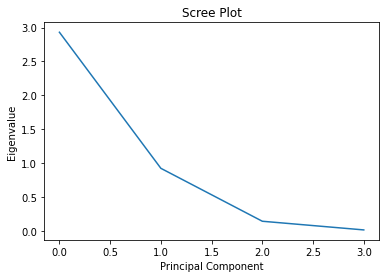

In [10]:
#Scree Plot
eigen_val = pca.explained_variance_
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.plot(eigen_val)
print(eigen_val)

[ 72.77  95.8   99.48 100.  ]


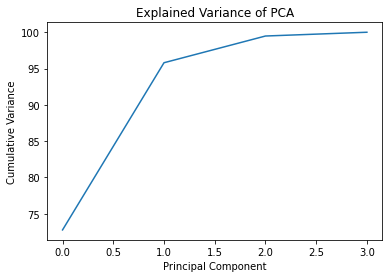

In [11]:
#Cumulative variance explain
var_pc=np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Variance')
plt.title('Explained Variance of PCA')
plt.plot(var_pc)
print(var_pc)

In [12]:
pca=PCA(n_components=2)
pca.fit(data2_std)
X=pca.fit_transform(data2_std)
print(X)

[[-2.26454173e+00  5.05703903e-01]
 [-2.08642550e+00 -6.55404729e-01]
 [-2.36795045e+00 -3.18477311e-01]
 [-2.30419716e+00 -5.75367713e-01]
 [-2.38877749e+00  6.74767397e-01]
 [-2.07053681e+00  1.51854856e+00]
 [-2.44571134e+00  7.45626750e-02]
 [-2.23384186e+00  2.47613932e-01]
 [-2.34195768e+00 -1.09514636e+00]
 [-2.18867576e+00 -4.48629048e-01]
 [-2.16348656e+00  1.07059558e+00]
 [-2.32737775e+00  1.58587455e-01]
 [-2.22408272e+00 -7.09118158e-01]
 [-2.63971626e+00 -9.38281982e-01]
 [-2.19229151e+00  1.88997851e+00]
 [-2.25146521e+00  2.72237108e+00]
 [-2.20275048e+00  1.51375028e+00]
 [-2.19017916e+00  5.14304308e-01]
 [-1.89407429e+00  1.43111071e+00]
 [-2.33994907e+00  1.15803343e+00]
 [-1.91455639e+00  4.30465163e-01]
 [-2.20464540e+00  9.52457317e-01]
 [-2.77416979e+00  4.89517027e-01]
 [-1.82041156e+00  1.06750793e-01]
 [-2.22821750e+00  1.62186163e-01]
 [-1.95702401e+00 -6.07892567e-01]
 [-2.05206331e+00  2.66014312e-01]
 [-2.16819365e+00  5.52016495e-01]
 [-2.14030596e+00  3

In [13]:
#Loading
PC = pca.components_
PC_trans = PC.transpose()
results = pd.DataFrame(PC_trans)
results.columns = ['PC 1', 'PC 2']
results.index = data2.columns
results

,PC 1,PC 2
sepallength,0.522372,0.372318
sepalwidth,-0.263355,0.925556
petallength,0.581254,0.021095
petalwidth,0.565611,0.065416


In [14]:
data_new = pd.DataFrame(X)
data_new.columns = ['PC 1', 'PC 2']
data_new['Class'] = data['class']
data_new.head()

,PC 1,PC 2,Class
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
